## Support Vector Machines on the Skin Segmentation Data Set

Evaluating Support Vector Machines on the [Skin Segmentation Data Set](https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation). Using numpy, pandas and scikit-learn.

## Setup
Imports the required dependencies, and define the path to the dataset.

In [19]:
%matplotlib inline

import utils; reload(utils)
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from __future__ import print_function

In [7]:
# Path to the dataset
path = '../core/src/test/resources/'

### Data Preparation
Prepare the training and testing dataset and convert them into numpy arrays.

In [18]:
train_csv = pd.read_csv(path + 'skin.train.csv')
test_csv = pd.read_csv(path + 'skin.test.csv')

train_data = np.array(train_csv)
X_train = train_data[:, :3]
y_train = np.ravel(train_data[:, 3])

test_data = np.array(test_csv)
X_test = test_data[:, :3]
y_test = np.ravel(test_data[:, 3])

## Modelling
Create a [Support Vector Machine](http://scikit-learn.org/stable/modules/svm.html) model and fit on the training dataset

- `kernel`: The kernel function (linear, polynomial, rbf, sigmoid
- `C`: Constraint violation for regularisation

Kernel-specific params see [here](http://scikit-learn.org/stable/modules/svm.html#kernel-functions)
- rbf: `gamma`
- sigmoid: `coef0`
- polynomial: `degree`, `coef0`

In [10]:
model = svm.SVC(kernel='rbf', C = 100.0)
model = model.fit(X_train, y_train)

# Check accuracy on the training dataset
model.score(X_train, y_train)

0.99996502253131936

### Evaluation

Evaluate the model on the testing dataset, and display the testing accuracy, confusion matrix and percision/recall.

Testing Accuracy 0.995048696882

             precision    recall  f1-score   support

          1       1.00      0.98      0.99     15289
          2       0.99      1.00      1.00     58227

avg / total       1.00      1.00      1.00     73516

Confusion matrix, without normalization


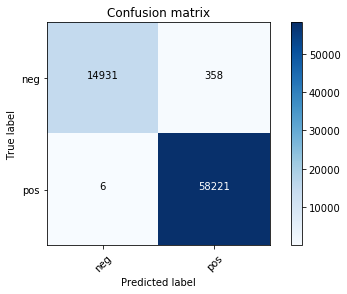

In [12]:
# Get predictions
preds = model.predict(X_test)

# Check accuracy on the testing dataset
print('Testing Accuracy', metrics.accuracy_score(y_test, preds), end='\n\n')


# F1 Score
print(metrics.classification_report(y_test, preds))

# Confusion matrix
cm = metrics.confusion_matrix(y_test, preds)
utils.plot_confusion_matrix(cm, ['neg', 'pos'])